## Midterm Exclusive
#### Class ALY6040.80439: Data Mining
#### Prof. Justin Grosz

### Team X members:  
####Hang Wu

#### April 28, 2022

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
import pandas as pd
from zipfile import ZipFile
import io
#import urllib2
from urllib.request import urlopen
import numpy as np #used for number manipiulation
import matplotlib.pyplot as plt #used for plotting
import math
import seaborn as sns
#imports
#!pip3 install scikit-learn
#!pip3 install lightgbm
#!pip3 install xgboost
#!pip install --upgrade matplotlib
#!pip install --upgrade pandas
#!pip install --upgrade numpy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [ ]:
##Restart session after each time the update occured, becasue Google Collab resets the udpate every time
#import os
#os.kill(os.getpid(), 9)


In [ ]:
##Data extraction##

#r = urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/00222/KickS-additional.zip").read()
#print(io.BytesIO(r))
#file = ZipFile(io.BytesIO(r)) #use io.ByteIO instead of io.StringIO to get the data into the correct unicode
import urllib
import urllib.request; 
#opener = urllib.request.urlopen()
#opener = urllib.request.URLopener()
url = "https://60802.s3.amazonaws.com/4gphone.csv"#upload to s3 because localhost kernel has issues, force to use online collab that required
#me to read file
ks_csv=urllib.request.urlopen(url)
#ks_csv = opener.open(url)

#print(file)
#file.extractall() #extract the folder to the current path
#print(file.namelist()) # list all of the files in the zip
#KickS_csv = file.open("KickS-additional/KickS-additional-full.csv") #open the file from the zip
KickS = pd.read_csv(ks_csv,sep = ',') # read_csv returns the dataframe type
display(KickS.head(3))
df=KickS
df_backup=df
#print(KickS)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20.0,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905.0,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263.0,1716,2603,11,2,9,1,1,0,1


Shape of Dataframe

In [ ]:
df.shape

(2000, 21)

Data type of features

In [ ]:
df.dtypes

battery_power      int64
blue               int64
clock_speed       object
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height        float64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price              int64
dtype: object

##CONVERT clock_speed to float

In [ ]:
df["clock_speed"] = pd.to_numeric(df['clock_speed'], errors='coerce').convert_dtypes()

In [ ]:
#All numeric attributes plotted as bar graphs (total of 10)
import matplotlib.pyplot as plt

df1 = df.select_dtypes([np.int, np.float])
for i, col in enumerate(df1.columns):
    plt.figure(i)
    df[col] = pd.to_numeric(df[col], errors='coerce').convert_dtypes()

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

STATISTICAL SUMMARY OF NUMERICAL COLUMNS

In [ ]:
round(df.describe(),2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price
count,2000.00,2000.0,1997.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,...,1959.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.0,2000.00,2000.0
mean,1238.52,0.5,1.52,0.51,4.31,0.52,32.05,0.50,140.25,4.52,...,646.74,1251.52,2124.21,12.31,5.77,11.01,0.76,0.5,0.51,0.5
std,439.42,0.5,0.82,0.50,4.34,0.50,18.15,0.29,35.40,2.29,...,443.78,432.20,1084.73,4.21,4.36,5.46,0.43,0.5,0.50,0.5
min,501.00,0.0,0.50,0.00,0.00,0.00,2.00,0.10,80.00,1.00,...,0.00,500.00,256.00,5.00,0.00,2.00,0.00,0.0,0.00,0.0
25%,851.75,0.0,0.70,0.00,1.00,0.00,16.00,0.20,109.00,3.00,...,284.00,874.75,1207.50,9.00,2.00,6.00,1.00,0.0,0.00,0.0
50%,1226.00,0.0,1.50,1.00,3.00,1.00,32.00,0.50,141.00,4.00,...,570.00,1247.00,2146.50,12.00,5.00,11.00,1.00,1.0,1.00,0.5
75%,1615.25,1.0,2.20,1.00,7.00,1.00,48.00,0.80,170.00,7.00,...,949.00,1633.00,3064.50,16.00,9.00,16.00,1.00,1.0,1.00,1.0
max,1998.00,1.0,3.00,1.00,19.00,1.00,64.00,1.00,200.00,8.00,...,1960.00,1998.00,3998.00,19.00,18.00,20.00,1.00,1.0,1.00,1.0


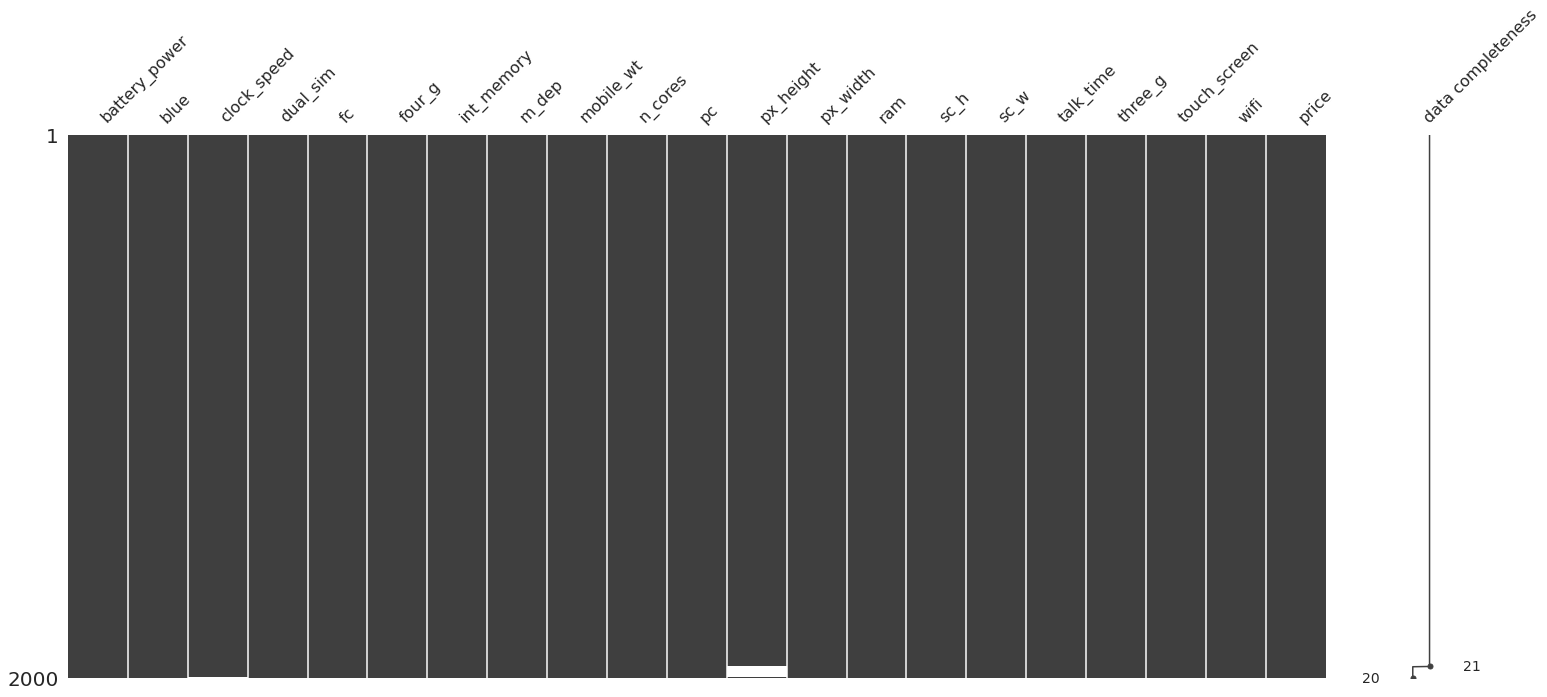

In [ ]:
import missingno as msno

msno.matrix(df_X, labels=True, sort="descending");

In [ ]:
#print(KickS.columns)

##Data Clean: data transformation, convert tdfpes##
#Conversion: convert it to a dictionardf
KickSd = KickS.to_dict()
#print(KickSd["age"])
#check if the data needs transformation
# skewness along the index axis
skewness = KickS.skew(axis=0, skipna = True)
#tdfpe(skewness) #float, let's change to dataframe
skewness = pd.DataFrame(skewness)
skewness.columns.name = "skewness"
display(skewness) #use skewness to get the descriptive stat, and renormalize the data
###---------------display the 
df = KickS




skewness,0
battery_power,0.031898
blue,0.020016
clock_speed,0.177533
dual_sim,-0.038035
fc,1.019811
four_g,-0.086144
int_memory,0.057889
m_dep,0.089082
mobile_wt,0.006558
n_cores,0.003628


In [ ]:
# kurtosis along the index axis
kurtosis = KickS.kurtosis(axis=0, skipna = True)
#tdfpe(skewness) #float, let's change to dataframe
kurtosis = pd.DataFrame(kurtosis)
print(kurtosis.columns.name)
kurtosis.columns.name = "kurtosis"

display(kurtosis)

None


kurtosis,0
battery_power,-1.224144
blue,-2.001602
clock_speed,-1.322628
dual_sim,-2.000555
fc,0.277076
four_g,-1.994575
int_memory,-1.216074
m_dep,-1.274349
mobile_wt,-1.210376
n_cores,-1.229750


## Checking for missing values

In [ ]:

df.isnull().sum()
#Clean data with .nadrop()
df = df.dropna()


In [ ]:
#count number of na
df.isnull().sum(axis = 0)


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price            0
dtype: int64

##Numerical features data distribution

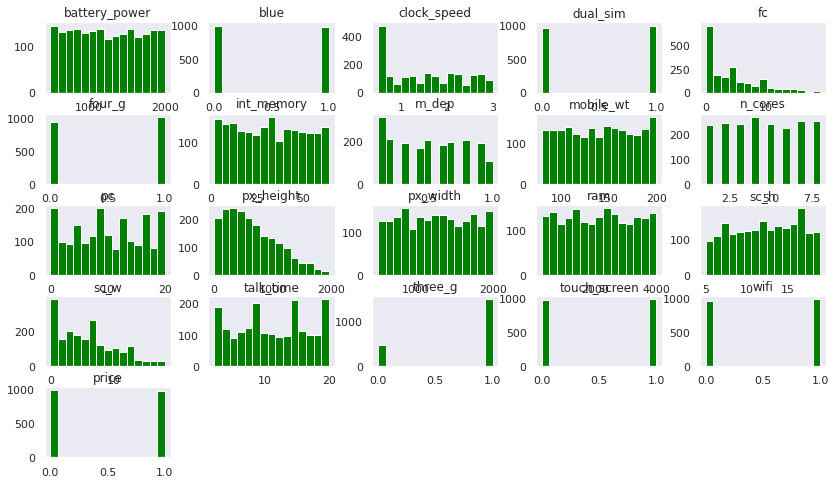

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
df.hist(figsize=(14,8),
               bins=15,
               grid=False,
               color='green')
plt.show()

##Features that are Numeric Columns Only

In [ ]:
numericalColumn = df.select_dtypes([np.number]).columns
print(numericalColumn.size)
print("\nNumerical columns: \n", numericalColumn)

21

Numerical columns: 
 Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price'],
      dtype='object')


##Dealing with Outliers of Three_G

In [ ]:
#get rid of outliers instead of marking them mean, unless that's needed then will do that after dealing with this first/
num_cols = ["three_g",'fc',]
for c in num_cols:     
  Q1 = df[c].quantile(0.25)
  Q3 = df[c].quantile(0.75)
  IQR = Q3-Q1

  filter = (df[c] >= Q1 - 1.5 * IQR) & (df[c] <= Q3 + 1.5 *IQR)
  df=df.loc[filter]

#df


In [ ]:
#a = np.arange(df['age'])
#hist, bin_edges = np.histogram(a)
import matplotlib.pyplot as plt

In [ ]:
#@title Default title text
corrMatrix = df.corr()
display(df.corr()) #display the correlation matrix table

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price
battery_power,1.000000,-0.006160,-0.000284,-0.062608,0.015174,0.020026,-0.001219,0.051078,-0.002069,-0.020376,...,0.002053,-0.009581,-0.002347,-0.019010,-0.009209,0.045926,NaN,-0.000671,-0.028942,0.153135
blue,-0.006160,1.000000,0.023774,0.005714,0.006226,0.042395,0.042336,0.008073,-0.010464,0.031390,...,-0.000395,-0.027656,0.017534,0.006703,0.022553,0.013576,NaN,0.005795,0.007112,0.004478
clock_speed,-0.000284,0.023774,1.000000,-0.007145,-0.007274,-0.028695,0.006069,0.003019,-0.004748,0.003447,...,-0.034935,-0.034636,0.019209,-0.041098,0.019060,-0.000177,NaN,0.004692,-0.010475,0.021360
dual_sim,-0.062608,0.005714,-0.007145,1.000000,-0.045361,0.022510,-0.019782,-0.029764,-0.011429,-0.019701,...,-0.019639,0.026593,0.031147,-0.013262,-0.015500,-0.031421,NaN,-0.023185,0.051463,-0.005557
fc,0.015174,0.006226,-0.007274,-0.045361,1.000000,-0.026056,-0.038443,-0.018064,0.019293,-0.013662,...,-0.023787,-0.031603,0.027961,0.000076,-0.012731,-0.003676,NaN,-0.007756,0.016479,0.038935
four_g,0.020026,0.042395,-0.028695,0.022510,-0.026056,1.000000,0.022569,0.005025,-0.036598,-0.035864,...,0.001140,0.012040,0.003748,0.028700,0.027002,-0.022261,NaN,0.015608,-0.034899,-0.015551
int_memory,-0.001219,0.042336,0.006069,-0.019782,-0.038443,0.022569,1.000000,0.013162,-0.043064,-0.038940,...,0.003425,-0.020014,0.020963,0.049648,0.042842,-0.018624,NaN,-0.045504,0.020559,0.013669
m_dep,0.051078,0.008073,0.003019,-0.029764,-0.018064,0.005025,0.013162,1.000000,0.014572,0.000100,...,0.037090,0.012426,0.006800,-0.024360,-0.028018,0.007804,NaN,-0.007101,-0.031655,-0.007103
mobile_wt,-0.002069,-0.010464,-0.004748,-0.011429,0.019293,-0.036598,-0.043064,0.014572,1.000000,-0.039975,...,0.017444,0.009709,0.007991,-0.038284,-0.013787,0.009740,NaN,-0.030859,-0.013562,-0.013535
n_cores,-0.020376,0.031390,0.003447,-0.019701,-0.013662,-0.035864,-0.038940,0.000100,-0.039975,1.000000,...,-0.005723,0.043978,0.008420,0.007968,0.037494,0.004022,NaN,0.038732,-0.014039,0.024715


In [ ]:
import statsmodels.stats.api as sms

#sms.DescrStatsW(df).tconfint_mean()


In [ ]:
df_X = df
# Check number of duplicates while ignoring the index feature
n_duplicates = df_X.drop(labels=["price"], axis=1).duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")

You seem to have 0 duplicates in your database.


In [ ]:
#  Extract column names of all features, except 'Accident_Index'
columns_to_consider = df_X.drop(labels=["price"], axis=1).columns

# Drop duplicates based on 'columns_to_consider'
df_X = df_X.drop_duplicates(subset=columns_to_consider)
df_X.shape


(1474, 21)

##Correlation Matrix: rule out MultiColinear related features

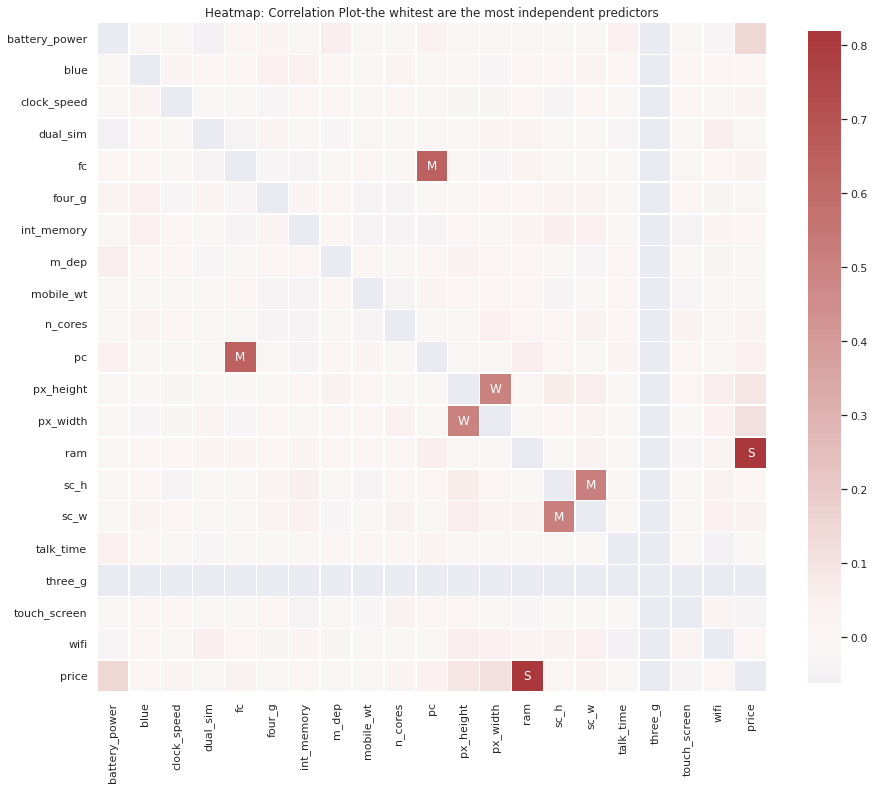

In [ ]:
df_X=df

# Computes feature correlation
df_corr = df_X.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8}).set(title=f"Heatmap: Correlation Plot-the whitest are the most independent predictors");

##Helper Function and Lirary Needed

In [ ]:
#sklearn will be used in later modelling
import pandas as pd
from zipfile import ZipFile
import io
import math
import seaborn as sns
#imports
!pip3 install scikit-learn
!pip3 install lightgbm
!pip3 install xgboost
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from zipfile import ZipFile
import pickle
from scipy import stats
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
from scipy.stats import ttest_rel
from numpy import sqrt, abs, round
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest as ztest
# machine learning
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
import lightgbm
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

In [ ]:

def histogram(df, feature):
    """
    Generates histogram plot on a feature of dataframe
    :param df: dataframe of loaded data
    :param feature: name of the feature
    """
    x_label = feature.capitalize()
    ax = sns.histplot(data=df, x=feature)
    plt.xlabel(f"{x_label}", size=14)
    plt.ylabel("Count", size=14)
    plt.title(f"Histogram: {x_label} Distribution", size=18)
    plt.savefig(f"{feature}_hist.png") #save image
    return plt

def barplot(df, x='', hue='',title=''):
    """
    Generates barplot plot on a features of dataframe
    :param df: dataframe of loaded data
    :param x: name of the interested feature
    :param hue: name of the target feature
    """
    ax = sns.countplot(x = x, hue= hue, data = df)
    x_label = x.capitalize()
    hue_label = hue.capitalize()
    xticklabels = list(df[x].unique())
    xticklabels = [str(i).upper() for i in xticklabels]
    ax.set_xticklabels(xticklabels)
    plt.xlabel(f"{x_label}", size=14)
    plt.ylabel(f"{hue_label} Count", size=14)
    plt.title(title)
    #plt.title(f"Bank Barplot: {hue_label} vs {x_label}", size=18)
    plt.savefig(f"{x_label}_barplot.png") #save image
    # add annotations
    for c in ax.containers:
      labels = [f'{v.get_height()/df[x].count()*100:0.1f}%' if (v.get_height()) > 0 else '' for v in c]
      ax.bar_label(c, labels=labels, label_type='edge')

    return plt

# function for countplot
def countplot(x, hue, **kwargs):
    """
    Generates countplot plot on a features
    :param x: name of the interested feature
    :param hue: name of the target feature
    """
    ax = sns.countplot(x=x, hue=hue,**kwargs)
    for c in ax.containers:
      labels = [f'{v.get_height()/df[x].count()*100:0.1f}%' if (v.get_height()) > 0 else '' for v in c]
      ax.bar_label(c, labels=labels, label_type='edge')
    plt.savefig(f"countplot_{x_label}.png") #save image

def grid_barplot(df='', row='', x='', hue=''):
    """
    Generates grid barplot plot on a features of dataframe
    :param df: dataframe of loaded data
    :param row: name of the feature for horizontal axis
    :param x: name of the interested feature
    :param hue: name of the target feature
    """
    # Find out how many people have insurance considering poverty, region, country
    g = sns.FacetGrid(data=df, row=row, height=2, aspect=2.5, sharex=False, sharey=False)
    g.map_dataframe(countplot, x=x, hue=hue, alpha=.6,
                    palette=sns.color_palette("tab10"))

    g.fig.suptitle('Health Insurance Enrollment')
    g.fig.subplots_adjust(top=0.9, left=0.1)
    g.set_xlabels(f'{row.capitalize()}')
    g.set_ylabels('Count')
    g.add_legend()
    return plt

def plot_feature_importance(X, Y):
    """
    Generates a plot of feature importance percentage
    :param X: independant features
    :param Y: dependant features
    """
    model = xgb.XGBClassifier()
    model.fit(X, Y)
    importance = model.feature_importances_
    feature_importance = np.array(importance)
    feature_names = np.array(X.columns)
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title('XGBoost Feature Importance')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    return plt

def get_test_plots(df, sample1, sample2):
    """
    Generates box and violine plots between two features of a dataframe
    :param df: dataframe of loaded data
    :param sample1: name of feature1
    :param sample2: name of feature2
    """
    sns.boxplot(x=sample1, y=sample2, data=df)
    plt.xlabel(f"{sample1.capitalize()}", size=14)
    plt.ylabel(f"{sample2.capitalize()}", size=14)
    plt.title(f"Boxplot: {sample1.capitalize()} vs {sample2.capitalize()} Comparison", size=20)
    plt.show()
    sns.violinplot(x=sample1, y=sample2, data=df)
    plt.xlabel(f"{sample1.capitalize()}", size=14)
    plt.ylabel(f"{sample2.capitalize()}", size=14)
    plt.title(f"Violinplot: {sample1.capitalize()} vs {sample2.capitalize()} Comparison", size=20)
    plt.show()
def  computeCI(stats):
  
    ci95_hi = []
    ci95_lo = []
    CI = []
    for i in stats.index:
        m, c, s = stats.loc[i]
        ci95_hi.append(float(m + 1.96*s/math.sqrt(c)))
        ci95_lo.append(float(m - 1.96*s/math.sqrt(c)))
        #CI.append(ci95_hi[i]-ci95_lo[i])

    stats['ci95_hi'] = pd.DataFrame(ci95_hi)
    stats['ci95_lo'] = pd.DataFrame(ci95_lo)
    #stats['CI'] = ci95_hi - ci95_lo
    display(stats.head(3)) #only display 3 results

    return stats


##Modelling

In [ ]:
from sklearn.model_selection import train_test_split
df = df.dropna()
x=df.drop(columns=['price','ram'])
#x=df.drop(columns=['price'])
Y=df['price']

#Split
#x_train, x_test, z_train, z_test = train_test_split(x, z, test_size=0.20)


x_train, x_test, z_train, z_test = train_test_split(x, Y, test_size=0.20) #80,20

##Singular matrix, needed to clean the table
##remove less variance field

In [ ]:
np.isnan(df.any()) #and gets False


battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price            False
dtype: bool

In [ ]:
np.isfinite(df.all()) #and gets True

battery_power    True
blue             True
clock_speed      True
dual_sim         True
fc               True
four_g           True
int_memory       True
m_dep            True
mobile_wt        True
n_cores          True
pc               True
px_height        True
px_width         True
ram              True
sc_h             True
sc_w             True
talk_time        True
three_g          True
touch_screen     True
wifi             True
price            True
dtype: bool

In [ ]:
import pandas as pd
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df = clean_dataset(df)

In [ ]:
import statsmodels.api as sm

Xlog2 = sm.add_constant(x_train) 
logr_model = sm.Logit(z_train, Xlog2.astype(float))

logr_fit = logr_model.fit() #singular matrix costed by the ram field, which is in perfect cor with price


print(logr_fit.summary())


Optimization terminated successfully.
         Current function value: 0.671130
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  price   No. Observations:                 1179
Model:                          Logit   Df Residuals:                     1160
Method:                           MLE   Df Model:                           18
Date:                Fri, 29 Apr 2022   Pseudo R-squ.:                 0.03172
Time:                        08:56:30   Log-Likelihood:                -791.26
converged:                       True   LL-Null:                       -817.19
Covariance Type:            nonrobust   LLR p-value:                 3.948e-05
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
battery_power     0.0007      0.000      5.133      0.000       0.000       0.001
blue              0.

##Confusion Matrix

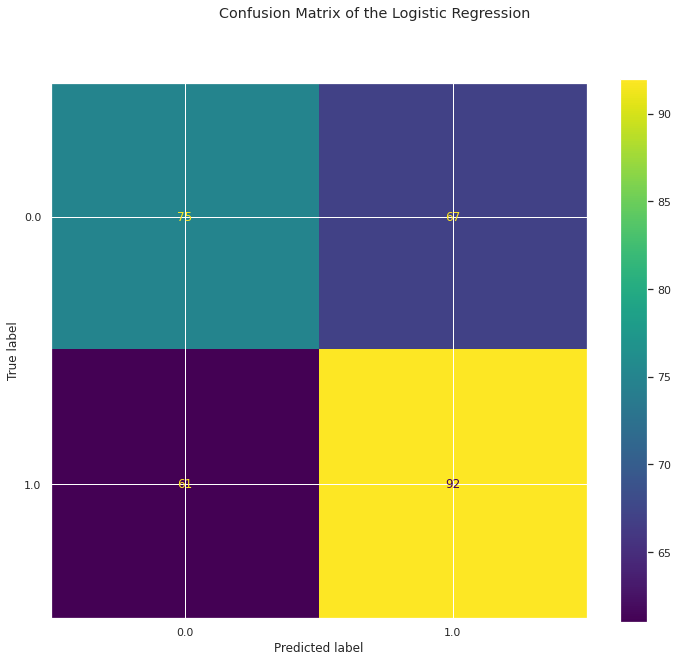

1620.5245809763856


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

data = pd.get_dummies(df)  # convert categorical to one-hone encoding

logistic_regression= LogisticRegression()
model=logistic_regression.fit(x_train,z_train)

#view results
model.fit(x_train, z_train)
plot_confusion_matrix(logistic_regression, x_test, z_test)  
plt.suptitle("Confusion Matrix of the Logistic Regression")
plt.show()

#a lot of false neg
print(logr_fit.aic)


##AIC, BIC (BIC is not as useful but frequently presented in researches) and ROC

In [ ]:
print(model.score(x_train,z_train))

print(logr_fit.aic)
print(logr_fit.bic)

0.5776081424936387
1620.5245809763856
1716.9005970865956


##Odds Ratio

In [ ]:
#source:https://www.pythonfordatascience.org/logistic-regression-python/
model_odds = pd.DataFrame(np.exp(logr_fit.params), columns= ['OR'])
model_odds['z-value']= logr_fit.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(logr_fit.conf_int())

model_odds

,OR,z-value,2.5%,97.5%
battery_power,1.000714,2.856942e-07,1.000441,1.000986
blue,1.032130,7.917955e-01,0.816133,1.305293
clock_speed,1.032245,6.645822e-01,0.894296,1.191474
dual_sim,1.029277,8.100503e-01,0.813470,1.302336
fc,1.009384,6.116970e-01,0.973632,1.046449
four_g,0.961006,7.585450e-01,0.745739,1.238414
int_memory,1.001088,7.416472e-01,0.994638,1.007579
m_dep,0.956566,8.313192e-01,0.635719,1.439342
mobile_wt,0.998973,5.494529e-01,0.995616,1.002340
n_cores,1.037793,1.639834e-01,0.984971,1.093448
